# TestCase 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config2.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 2
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
high_degree = 10

In [4]:
assert testcase == 2
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/flecourtier/Bureau/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version == 1:
    from testcases.networks.test_2D.test_2.test_2_v1 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase2
problem = TestCase2(version=version)

Using device: cuda
cuda devices:        1
cuda current device: 0
cuda device name:    NVIDIA RTX 2000 Ada Generation Laptop GPU
torch loaded; device is cuda


0.0   1.5
0.0   10.0
init
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_2D/test_fe2.pth
network loaded
Error  tensor([0.0179])


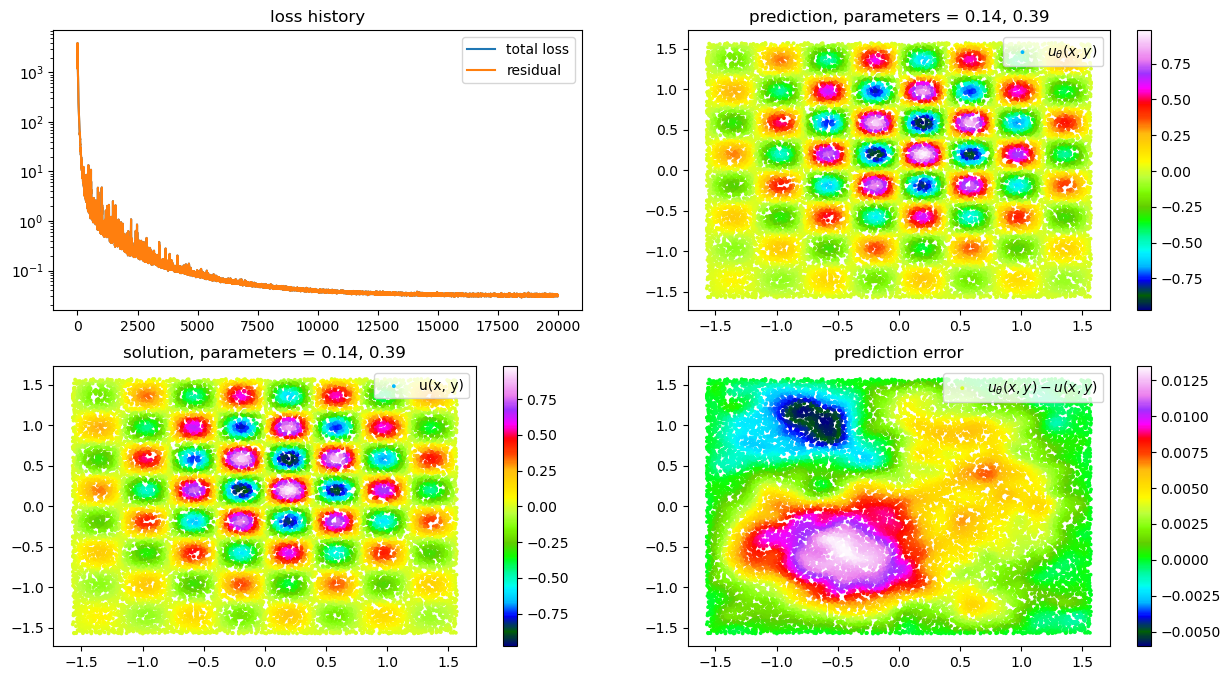

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all
from modfenics.error_estimations.compare import plot_Corr_vs_FEM,save_tab_deg,save_tab_all

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [11]:
param_num = config["error_estimations"]["param_num"]     
result_dir = testcase_dir + "/cvg/"
create_tree(result_dir)

### Run FEM

In [12]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param1_degree1.csv


## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param1_degree1.csv
## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param1_degree2.csv
## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param1_degree3.csv


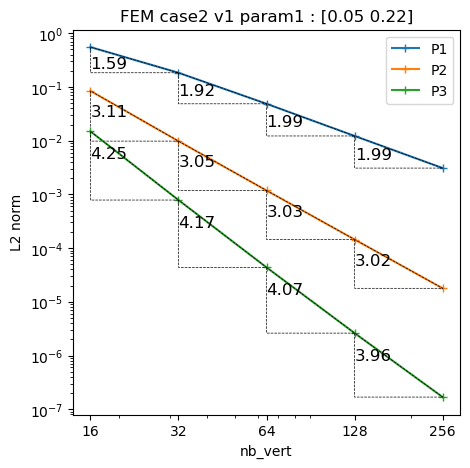

In [13]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Add

In [12]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=True,result_dir=result_dir)

## Run error estimation with Corr (add) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
Time to generate V_ex:  2.353610038757324
Time to generate mesh:  0.0056188106536865234
V created with  16  vertices and degree  4  : h = 0.29619219587722484
Time to assemble the matrix :  0.27251696586608887
Time to solve the system : 0.012421369552612305


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.79 GiB. GPU 0 has a total capacty of 7.66 GiB of which 76.19 MiB is free. Including non-PyTorch memory, this process has 7.57 GiB memory in use. Of the allocated memory 7.42 GiB is allocated by PyTorch, and 29.37 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [16]:
tab_err_Corr

[0.0013635622957359,
 0.0004663391765974,
 0.00013712766485,
 3.635288810090002e-05,
 9.319619183155994e-06]

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree1.csv
## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree2.csv
## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree3.csv


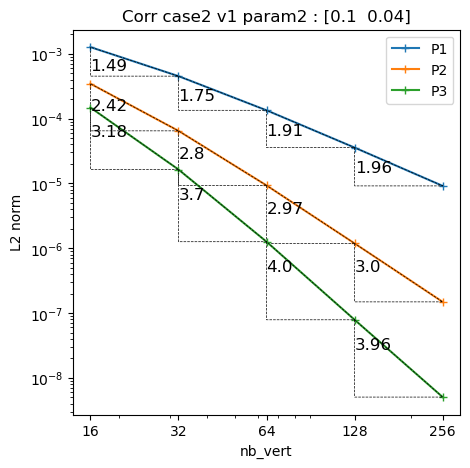

In [32]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Save results

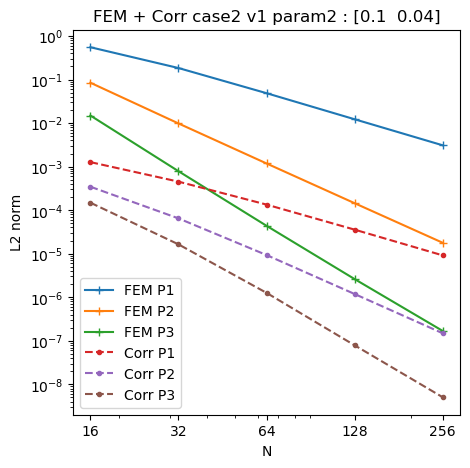

In [33]:
plot_Corr_vs_FEM(param_num,problem,result_dir=result_dir)

In [34]:

save_tab_all(param_num,problem,result_dir=result_dir)

/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/flecourtier/Bureau/Article1/code/src/modfeni

## Gains

### Imports

In [18]:
from modfenics.gains.fem import compute_error_fem_deg,compute_error_fem_all
from modfenics.gains.pinns import compute_error_pinns_deg,compute_error_pinns_all
from modfenics.gains.add import compute_error_Corr_deg,compute_error_Corr_all
from modfenics.gains.compare import create_dataframes_deg,create_dataframes_all,save_stats_deg,save_stats_all

In [19]:
n_params = config["gains"]["n_params"]   
result_dir = testcase_dir + "/gains/"
create_tree(result_dir) 

### Run FEM

In [20]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_fem_deg(n_params,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run gains with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.23383594411359887
0 1 

KeyboardInterrupt: 

In [ ]:
# compute_error_fem_all(n_params,problem,high_degree,new_run=False,result_dir=result_dir)

### Run PINNs

In [ ]:
degree = 1
df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_pinns_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_Corr_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Compare methods

In [ ]:
degree = 1
df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [ ]:
# create_dataframes_all(n_params,problem,result_dir=result_dir)

In [ ]:
df_stats_Add = save_stats_deg(n_params,problem,degree,result_dir=result_dir)